In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pathlib
import numpy as np

%load_ext autoreload
%autoreload 2
%load_ext lab_black

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))

scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2


In [2]:
BASE_PATH = pathlib.Path(
    "/Users/giovanni.palla/dataset_raw_icb/20201214_SquidpyData_giovanni.palla"
)
DATA_PATH = "4i"

In [3]:
adata = sc.read(BASE_PATH / DATA_PATH / "4i.h5ad")
adata.obs["cell_id"] = pd.Categorical(adata.obs["cell_id"].values.astype(str))
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 1761761 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id'
    obsm: 'spatial'

In [4]:
idx = (
    adata[adata.obs.cell_id.isin(np.arange(118, 150, 1).astype(str))]
    .obs.cell_id.value_counts()[
        adata[
            adata.obs.cell_id.isin(np.arange(118, 150, 1).astype(str))
        ].obs.cell_id.value_counts()
        > 1000
    ]
    .index.tolist()
)
idx.remove("124")  # remove because feature outlier

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


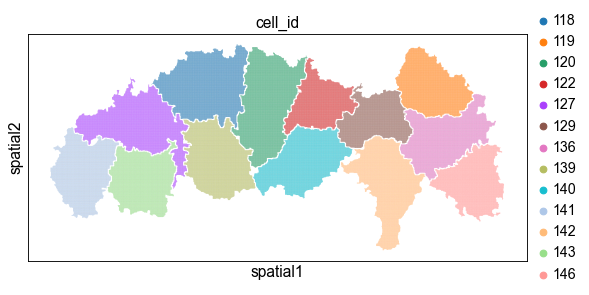

In [5]:
sc.pl.spatial(
    adata[adata.obs.cell_id.isin(idx)].copy(),
    color="cell_id",
    spot_size=1,
)

In [6]:
adata = adata[adata.obs.cell_id.isin(idx)].copy()
sc.pp.subsample(adata, fraction=0.8, copy=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [8]:
arr = adata.X.copy()

In [9]:
qt = QuantileTransformer(n_quantiles=1000, random_state=0)
arr_quant = qt.fit_transform(arr)

In [10]:
scaler = StandardScaler()
arr_scaled = scaler.fit_transform(arr_quant)

In [11]:
adata.X = arr_scaled

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [13]:
sc.tl.leiden(adata)

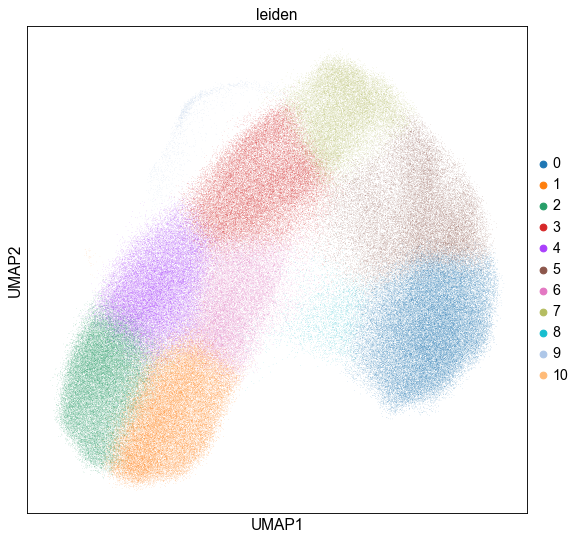

In [14]:
sc.pl.umap(adata, color="leiden")

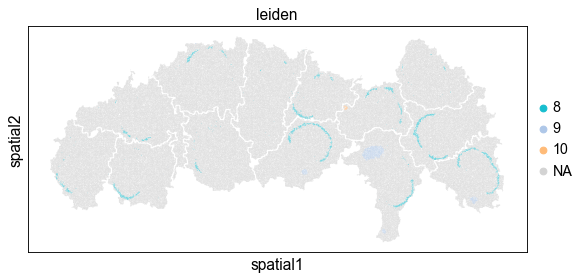

In [16]:
sc.pl.spatial(
    adata,
    color="leiden",
    groups=["8", "9", "10"],
    spot_size=1,
)

In [30]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

/Users/giovanni.palla/Projects/scanpy/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


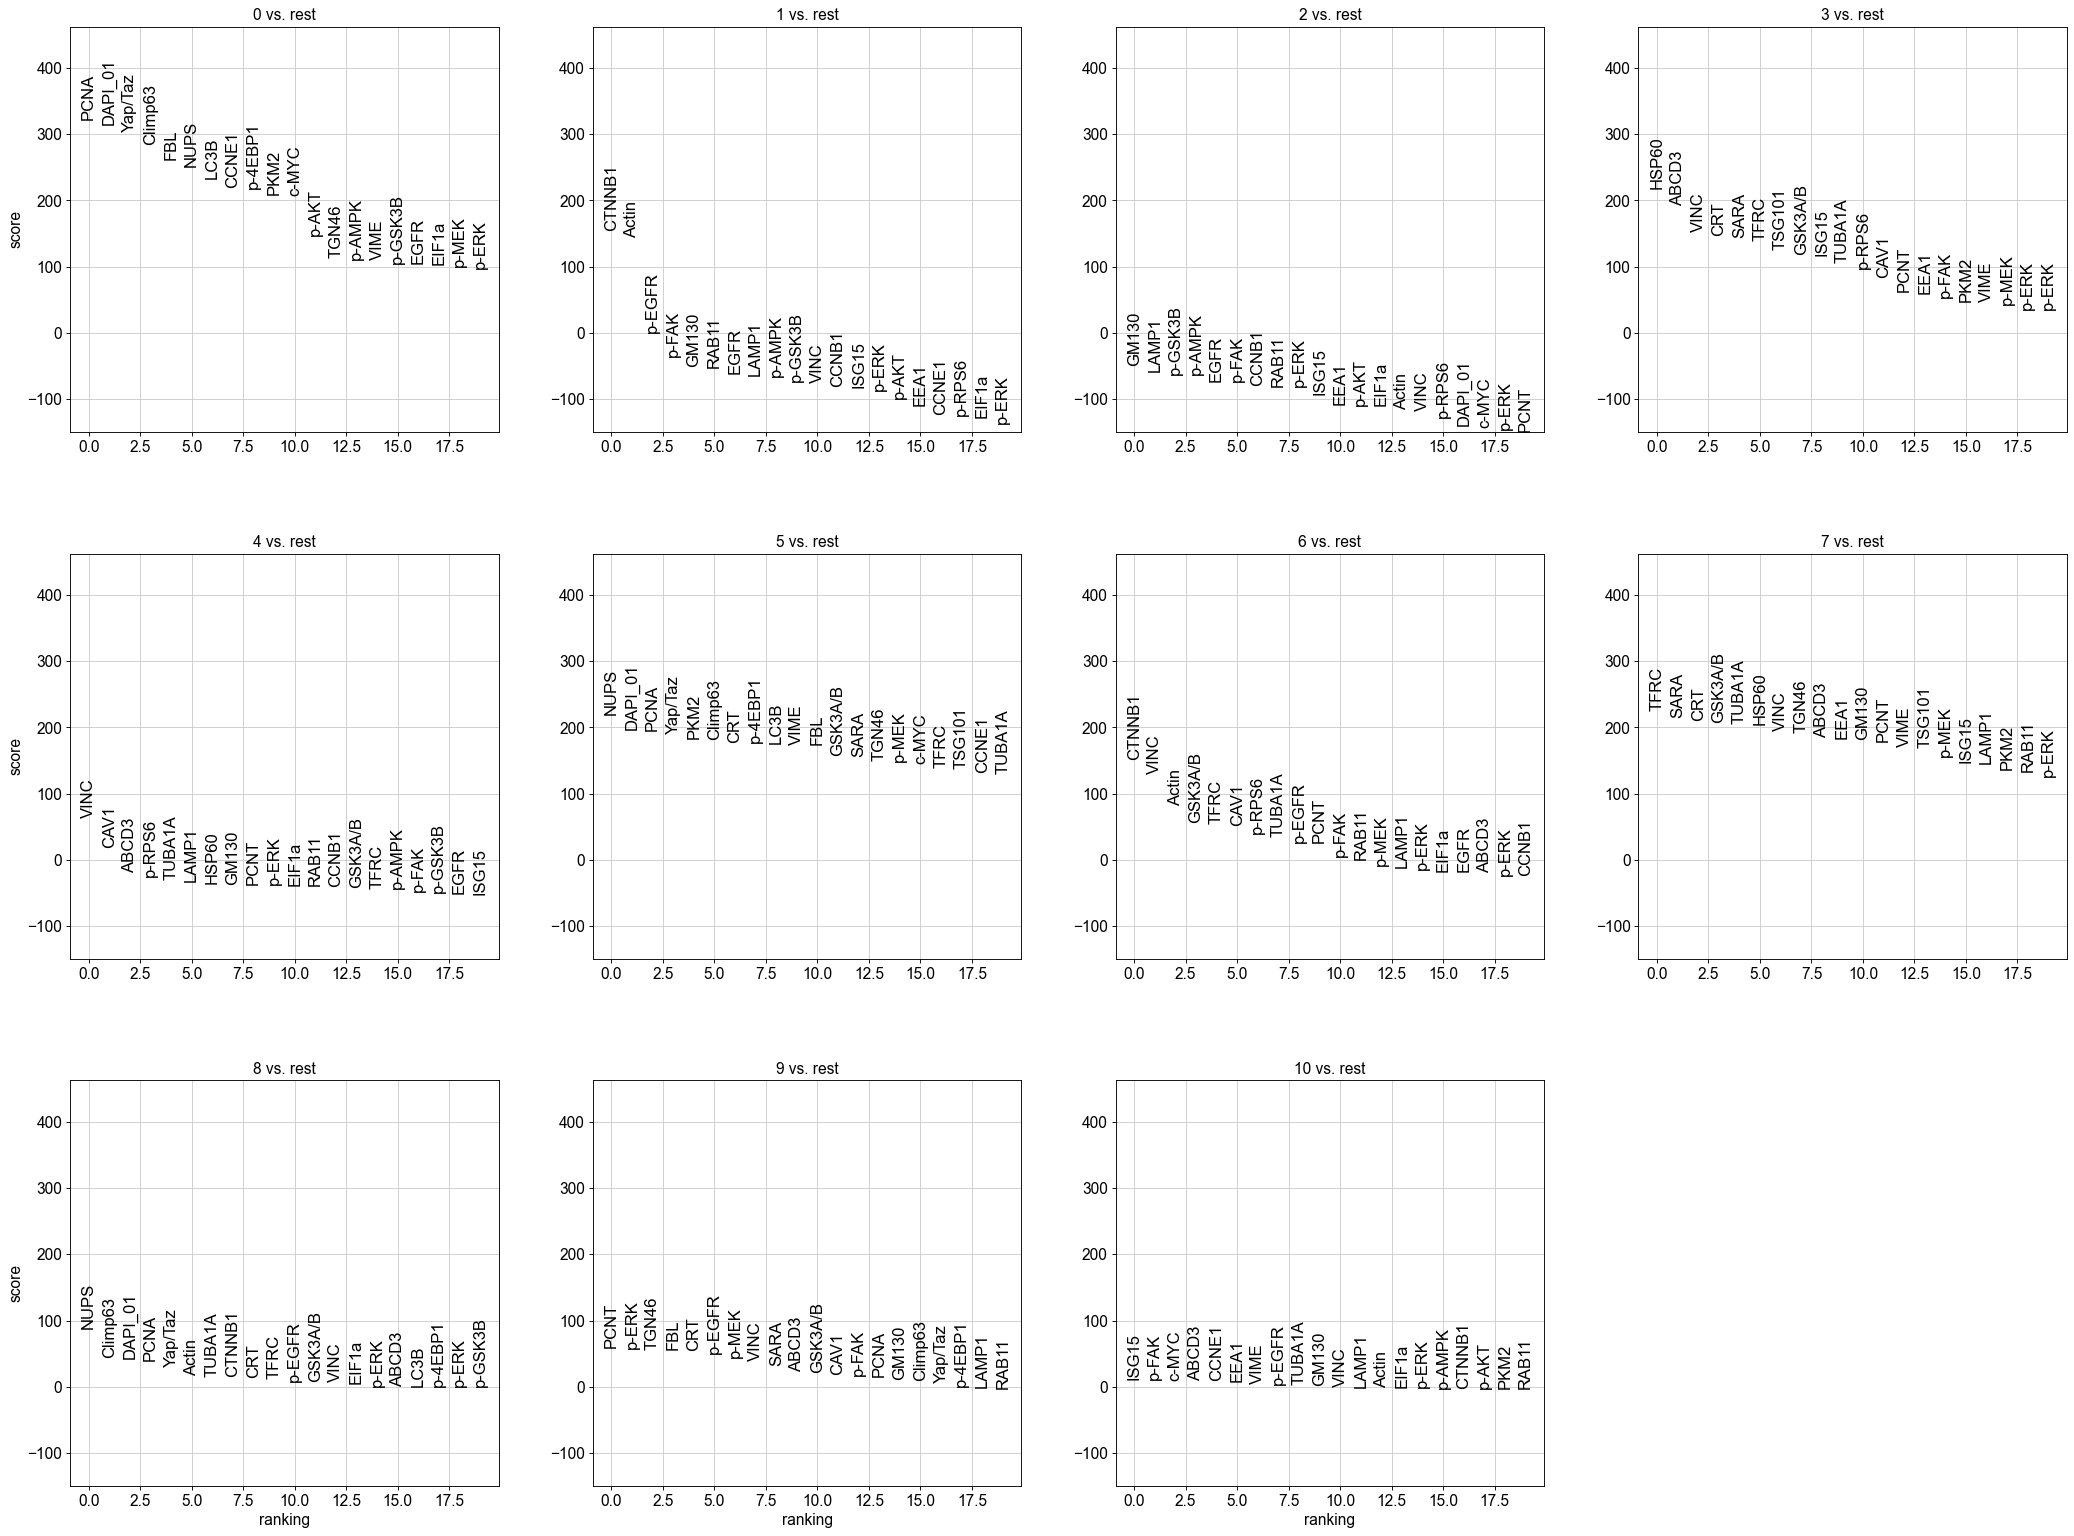

In [31]:
sc.pl.rank_genes_groups(adata, fontsize=15)

Based on above markers and this [paper](https://science.sciencemag.org/content/361/6401/eaar7042) we annotated the clusters as following:
```python
"0" : "Nucleolus",
"1" : "Cell_periphery_1",
"2" : "Cell_periphery_2",
"3" : "ER_mitochondria_1",
"4" : "ER_mitochondria_2",
"5" : "Nucleus",
"6" : "Cell_periphery_3",
"7" : "Endosomes_golgi_1",
"8" : "Nuclear_envelope",
"9" : "Endosomes_golgi_2",
"10" : "ER_mitochondria_3",
```

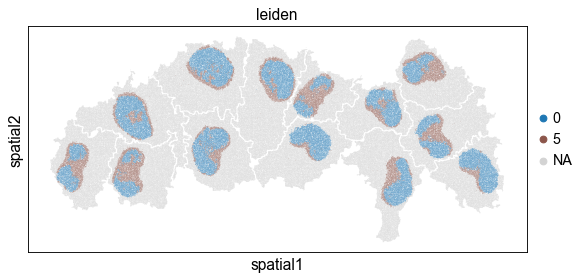

In [25]:
sc.pl.spatial(
    adata,
    color="leiden",
    groups=["0", "5"],
    spot_size=1,
)

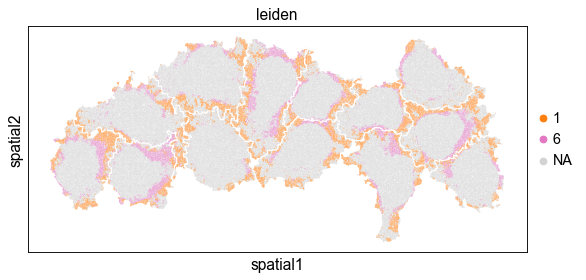

In [28]:
sc.pl.spatial(
    adata,
    color="leiden",
    groups=["1", "6"],
    spot_size=1,
)

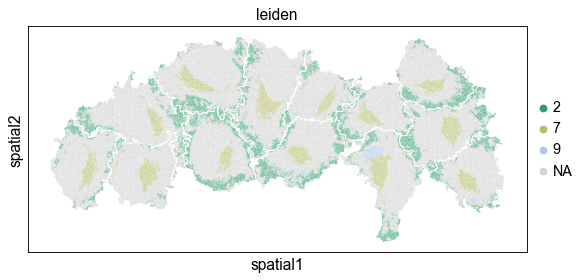

In [29]:
sc.pl.spatial(
    adata,
    color="leiden",
    groups=["2", "7", "9"],
    spot_size=1,
)

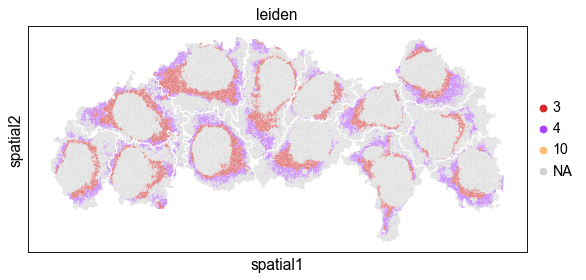

In [34]:
sc.pl.spatial(
    adata,
    color="leiden",
    groups=["3", "4", "10"],
    spot_size=1,
)

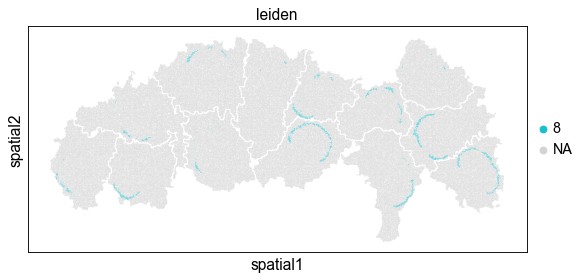

In [35]:
sc.pl.spatial(
    adata,
    color="leiden",
    groups=[
        "8",
    ],
    spot_size=1,
)

In [38]:
annotation = {
    "0": "Nucleolus",
    "1": "Cell_periphery_1",
    "2": "Cell_periphery_2",
    "3": "ER_mitochondria_1",
    "4": "ER_mitochondria_2",
    "5": "Nucleus",
    "6": "Cell_periphery_3",
    "7": "Endosomes_golgi_1",
    "8": "Nuclear_envelope",
    "9": "Endosomes_golgi_2",
    "10": "ER_mitochondria_3",
}

In [39]:
adata.obs["cluster"] = pd.Categorical(adata.obs.leiden.replace(annotation))

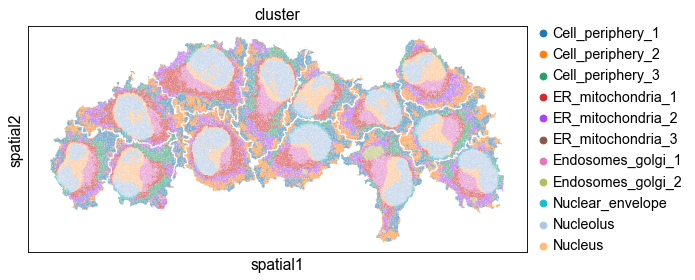

In [40]:
sc.pl.spatial(adata, color="cluster", spot_size=1)

In [41]:
adata.write("/Users/giovanni.palla/Datasets/tutorial_data/4i.h5ad")